In [33]:
# Modules for debugging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend
import shap


# Custom modules
from preprocessing_post_fastsurfer.alignment import *
from preprocessing_post_fastsurfer.cropping import *
from preprocessing_post_fastsurfer.extraction import *
from preprocessing_post_fastsurfer.file_handling import *
from preprocessing_post_fastsurfer.mesh_creation import *
from preprocessing_post_fastsurfer.subject import *
from preprocessing_post_fastsurfer.vis import *

# Custom modules
from ozzy_torch_utils.split_dataset import *
from ozzy_torch_utils.subject_dataset import *

np.set_printoptions(precision=2, suppress=True)

In [34]:
data_path = "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/scratch-disk/full-datasets/hcampus-1.5T-cohort"

selected_labels = ['CN', 'MCI']

# Dictionary key representing the disease labels
labels_string = 'research_group'

In [ ]:
dataset = SubjectDataset(data_path, selected_labels, data_string='volumes')

In [ ]:
labels = np.array([dataset[index]['research_group'] for index in range(len(dataset.subject_list))])

volumes = np.array([dataset[index]['volumes'] for index in range(len(dataset.subject_list))])

print(f"Unique labels: {np.unique(labels, return_counts=True)}\n")

In [ ]:
scoring = 'accuracy'
n_estimators=4
learning_rate=0.1 
max_depth=3

with parallel_backend('threading', n_jobs=8):

    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    cv = StratifiedKFold(n_splits=10, shuffle=True)

    cv_scores = cross_val_score(model, volumes, labels, cv=cv, scoring=scoring)

    print(f'Cross-validation {scoring} scores: {cv_scores}')
    print(f'Mean cross-validation {scoring}: {np.mean(cv_scores)}')
    print(f'Standard deviation of cross-validation {scoring}: {np.std(cv_scores)}')

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='b', linestyle='-', label=f'{scoring} per fold')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean {scoring} ({np.mean(cv_scores):.2f})')
plt.title(f'Cross-Validation {scoring} Scores for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel(f'{scoring}')
plt.ylim(0.5,1)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:

model.fit(volumes, labels)
feature_importance = pd.Series(model.feature_importances_)
print(max(feature_importance))
feature_importance.sort_values()[-10:].plot(kind="barh", figsize = (10, 20))

543


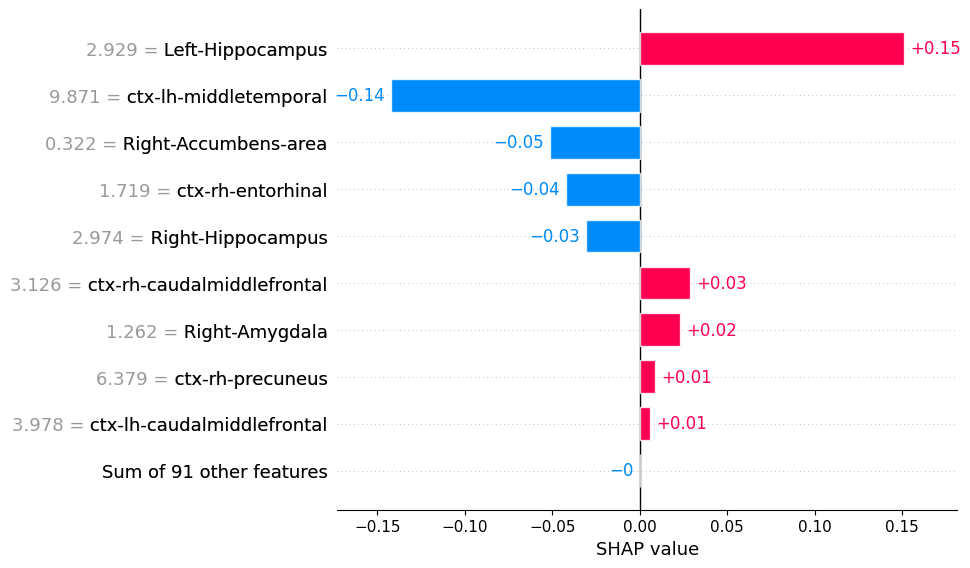

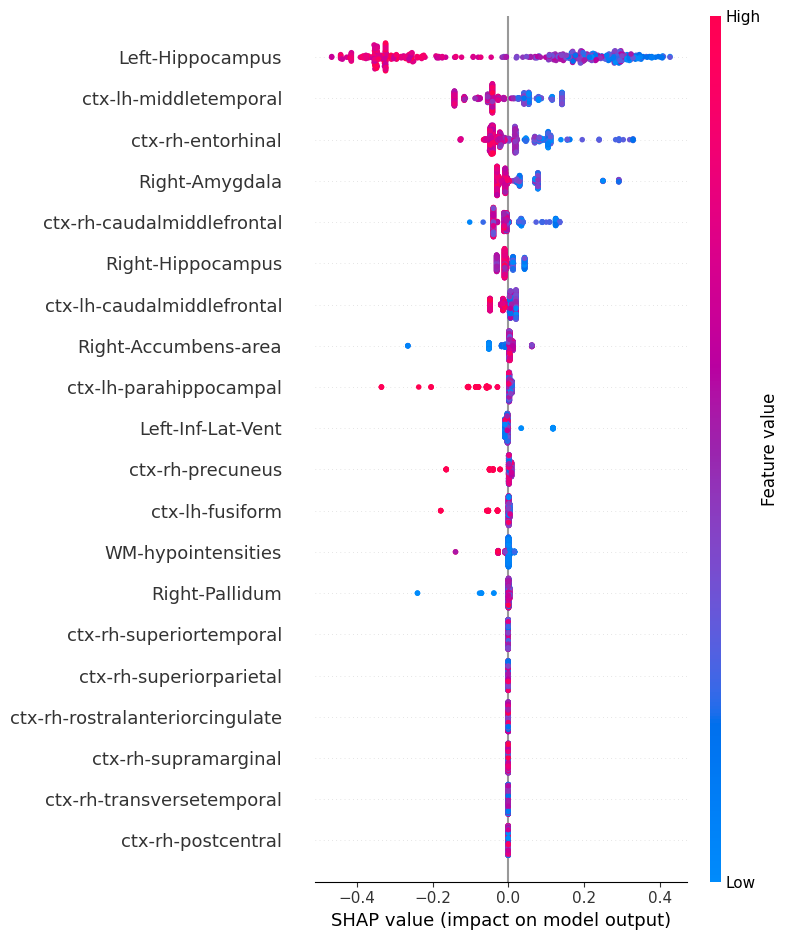

In [41]:
model = GradientBoostingClassifier(n_estimators=4, learning_rate=0.1, max_depth=3)

model.fit(volumes, labels)

explainer = shap.Explainer(model, feature_names=dataset[0]['struct_names'])

shap_values = explainer(volumes)

print(len(shap_values))

shap.plots.bar(shap_values[0], max_display=10)

shap.summary_plot(shap_values, volumes,)
